In [20]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Importing dataset

df= pd.read_csv("stock price datset.csv")
df=pd.DataFrame(df)

In [22]:
df.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,17-03-1980,0.927141,0.908554,0.0,0.917847,1158040.1,0.520855
1,1,18-03-1980,0.930239,0.914749,0.0,0.927141,1622063.1,0.525637
2,2,19-03-1980,0.942631,0.927141,0.0,0.942631,1367859.1,0.533608
3,3,20-03-1980,0.961218,0.939533,0.0,0.939533,3046412.1,0.532014
4,4,21-03-1980,0.948826,0.936435,0.0,0.936435,1020851.1,0.530420


In [23]:

#Data Information

In [24]:
df.describe()

,index,High,Low,Open,Close,Volume,Adj Close
count,10752.000000,10752.000000,10752.000000,10752.000000,10752.000000,1.075200e+04,10752.000000
mean,5375.500000,45.513600,44.666703,44.896936,45.118323,2.063540e+06,37.623797
std,3103.979381,53.810046,52.828649,53.398649,53.349075,1.417562e+06,52.196452
min,0.000000,0.927141,0.908554,0.000000,0.911652,8.070100e+03,0.517667
25%,2687.750000,5.552316,5.462476,5.415141,5.527532,1.196101e+06,3.176103
50%,5375.500000,33.055778,32.219095,32.515629,32.714761,1.758100e+06,21.508132
75%,8063.250000,49.033276,48.300176,48.529410,48.728345,2.552245e+06,37.441774
max,10751.000000,261.689996,259.649988,260.369995,261.040002,3.133089e+07,259.917322


In [25]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)

index 	-	 0.0
Date 	-	 0.0
High 	-	 0.0
Low 	-	 0.0
Open 	-	 0.0
Close 	-	 0.0
Volume 	-	 0.0
Adj Close 	-	 0.0


In [26]:
#Since there is no null valus, we can move further

<AxesSubplot:>

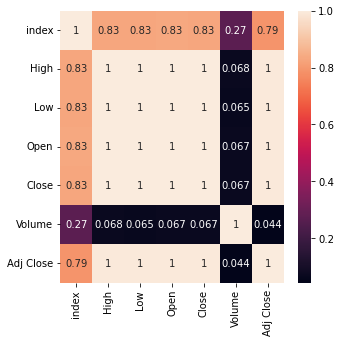

In [27]:
cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [28]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [29]:
top_corelated_values = get_corelated_col(cormap['Close'], 0.60)
top_corelated_values

,corr value
index,0.830564
High,0.999928
Low,0.999921
Open,0.999833
Close,1.000000
Adj Close,0.995979


In [30]:
#Looks like all colums except volume are highly co-related. Using them for predictions.

In [31]:
df = df[top_corelated_values.index]
df.head()

,index,High,Low,Open,Close,Adj Close
0,0,0.927141,0.908554,0.0,0.917847,0.520855
1,1,0.930239,0.914749,0.0,0.927141,0.525637
2,2,0.942631,0.927141,0.0,0.942631,0.533608
3,3,0.961218,0.939533,0.0,0.939533,0.532014
4,4,0.948826,0.936435,0.0,0.936435,0.530420


In [32]:
df.shape

(10752, 6)

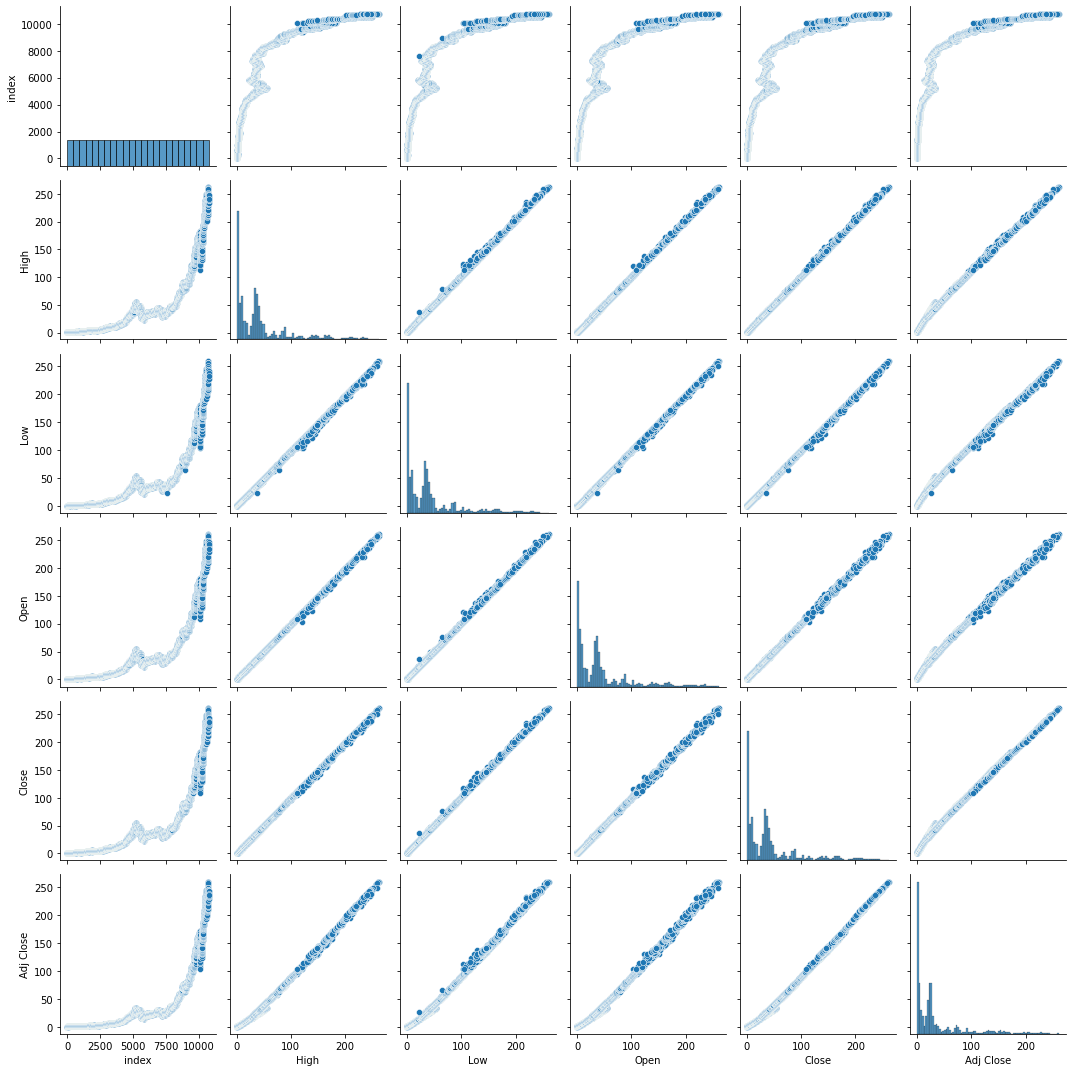

In [33]:
sns.pairplot(df)
plt.tight_layout()

In [34]:
#Since other parameters have linear relationship with close, we are using some linear models fore prediction

In [35]:
X=df.drop(['Close'], axis=1)
Y=df['Close']

In [36]:
#Since range of data in different columns veries significantly we need to scale the independent variable i.e. X. For this we will use Min-Max Scaling.

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()


,index,High,Low,Open,Adj Close
0,0.000000,0.000000,0.000000,0.0,0.000012
1,0.000093,0.000012,0.000024,0.0,0.000031
2,0.000186,0.000059,0.000072,0.0,0.000061
3,0.000279,0.000131,0.000120,0.0,0.000055
4,0.000372,0.000083,0.000108,0.0,0.000049


In [38]:
#PREDICTION MODEL

In [39]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,shuffle=False)
Acc=[]

In [40]:
#1. Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train,Y_train)

LinearRegression()

In [42]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual':Y_test,'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
8601,67.079805,67.048073
8602,67.369531,67.388152
8603,66.526689,66.937790
8604,66.544252,66.675722
8605,67.694383,67.439219


In [43]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(Y_test, y_pred_1)))
Acc.append(r2_score(Y_test, y_pred_1))

Accuracy score of the predictions: 0.9996136394478647


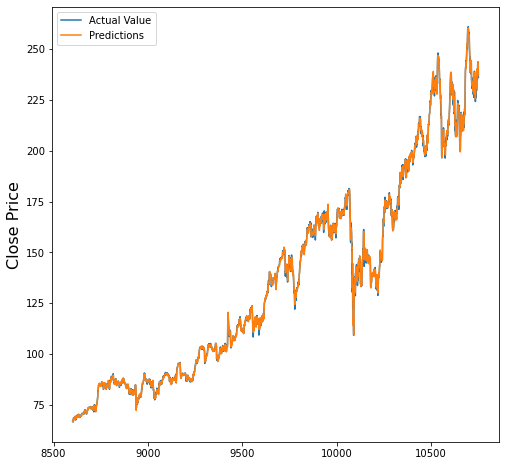

In [44]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [45]:
#2. ANN

In [46]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [48]:
 #Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [49]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size = 0.2,shuffle=False)

Acc=[]

In [50]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [51]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [52]:
# Model Training

model_2= reg()
model_2.fit(X_train,Y_train, epochs=70,validation_split=0.2)

Epoch 1/70
215/215 [==============================] - 4s 8ms/step - loss: 71.1452 - val_loss: 29.1334
Epoch 2/70
215/215 [==============================] - 1s 7ms/step - loss: 0.9020 - val_loss: 10.7096
Epoch 3/70
215/215 [==============================] - 1s 6ms/step - loss: 0.1435 - val_loss: 4.7931
Epoch 4/70
215/215 [==============================] - 1s 6ms/step - loss: 0.0861 - val_loss: 4.6945
Epoch 5/70
215/215 [==============================] - 1s 6ms/step - loss: 0.0782 - val_loss: 2.3134
Epoch 6/70
215/215 [==============================] - 1s 6ms/step - loss: 0.1137 - val_loss: 4.0947
Epoch 7/70
215/215 [==============================] - 1s 6ms/step - loss: 0.0891 - val_loss: 3.6475
Epoch 8/70
215/215 [==============================] - 1s 7ms/step - loss: 0.0989 - val_loss: 3.1357
Epoch 9/70
215/215 [==============================] - 1s 7ms/step - loss: 0.0777 - val_loss: 6.6133
Epoch 10/70
215/215 [==============================] - 1s 7ms/step - loss: 0.0912 - val_loss: 3.3

In [53]:
# Prediction

y_pred_2 =model_2.predict(X_test)

68/68 [==============================] - 0s 3ms/step


In [54]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions:{0}".format(r2_score(Y_test,y_pred_2)))
Acc.append(r2_score(Y_test,y_pred_2))

Accuracy score of the predictions:0.993852319114144


In [55]:
from matplotlib import pyplot as plt

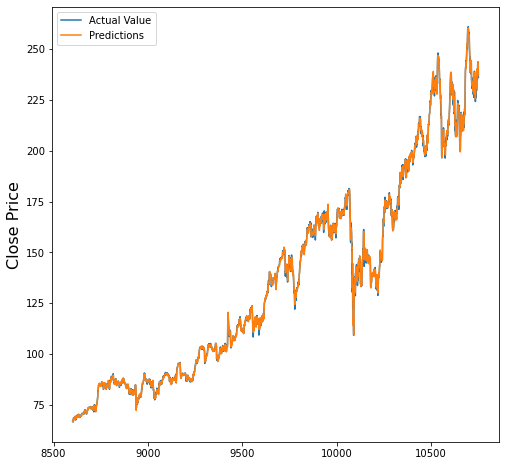

In [56]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [57]:
#3. CNN

In [58]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [59]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [60]:
# Model Training

model_3 = reg()
model_3.fit(X_train,Y_train, epochs=100, validation_split=0.2)

Epoch 1/100
215/215 [==============================] - 4s 9ms/step - loss: 60.1538 - val_loss: 24.1633
Epoch 2/100
215/215 [==============================] - 2s 7ms/step - loss: 0.9212 - val_loss: 7.2443
Epoch 3/100
215/215 [==============================] - 1s 7ms/step - loss: 0.1172 - val_loss: 3.3713
Epoch 4/100
215/215 [==============================] - 2s 7ms/step - loss: 0.0810 - val_loss: 4.0988
Epoch 5/100
215/215 [==============================] - 2s 7ms/step - loss: 0.0792 - val_loss: 1.6806
Epoch 6/100
215/215 [==============================] - 1s 7ms/step - loss: 0.0760 - val_loss: 1.7318
Epoch 7/100
215/215 [==============================] - 1s 6ms/step - loss: 0.0663 - val_loss: 1.4953
Epoch 8/100
215/215 [==============================] - 2s 7ms/step - loss: 0.0964 - val_loss: 2.3887
Epoch 9/100
215/215 [==============================] - 2s 8ms/step - loss: 0.0820 - val_loss: 3.6183
Epoch 10/100
215/215 [==============================] - 2s 7ms/step - loss: 0.0900 - val_

In [61]:
# Prediction

y_pred_3 = model_3.predict(X_test)

68/68 [==============================] - 0s 4ms/step


In [62]:
pred_df = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
8601,67.079805,71.433960
8602,67.369531,71.933739
8603,66.526689,71.226448
8604,66.544252,71.009613
8605,67.694383,71.878181


In [63]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(Y_test, y_pred_3)))
Acc.append(r2_score(Y_test, y_pred_3))

Accuracy score of the predictions: 0.9423331961866044


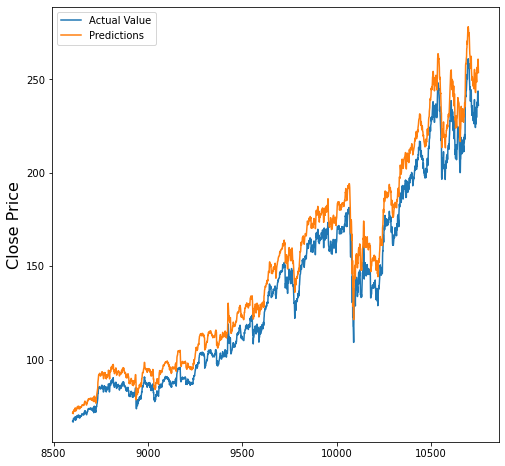

In [64]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price',fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value','Predictions'])
plt.show()

In [65]:
#Comparision of Accuracies of different models

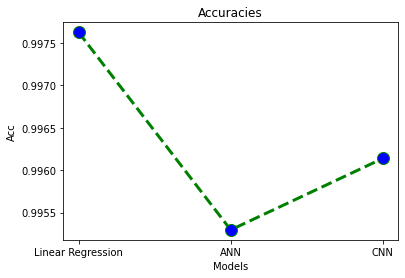

In [101]:
plt.plot(range(3),Acc,color='green',linestyle='dashed',linewidth=3, 
         marker='o',markerfacecolor='blue',markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3),['Linear Regression','ANN','CNN'])
plt.show()

In [ ]:
#Now converting data in a time series data and applying some more models.

In [68]:
Close = df.reset_index()['Close']
Close.head()

0    0.917847
1    0.927141
2    0.942631
3    0.939533
4    0.936435
Name: Close, dtype: float64

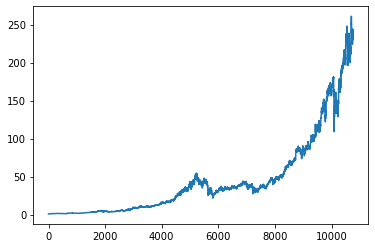

In [69]:
plt.plot(Close)
plt.show()

In [70]:
time_step = 30
X, y = [], []

for i in range(len(Close)-time_step-1):
    X.append(Close[i:(i+time_step)])
    y.append(Close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [71]:
X[:5]

array([[0.91784701, 0.92714099, 0.94263098, 0.93953297, 0.93643502,
        0.930239  , 0.930239  , 0.94263098, 0.911652  , 0.93643502,
        0.94572899, 0.95812002, 0.99839298, 1.01698003, 1.00149099,
        0.98600099, 0.98600099, 0.99529502, 1.004589  , 0.99219701,
        0.99839298, 1.004589  , 0.99839298, 0.99839298, 0.99839298,
        1.004589  , 1.01078502, 1.01698003, 1.01388202, 1.026274  ],
       [0.92714099, 0.94263098, 0.93953297, 0.93643502, 0.930239  ,
        0.930239  , 0.94263098, 0.911652  , 0.93643502, 0.94572899,
        0.95812002, 0.99839298, 1.01698003, 1.00149099, 0.98600099,
        0.98600099, 0.99529502, 1.004589  , 0.99219701, 0.99839298,
        1.004589  , 0.99839298, 0.99839298, 0.99839298, 1.004589  ,
        1.01078502, 1.01698003, 1.01388202, 1.026274  , 1.02317599],
       [0.94263098, 0.93953297, 0.93643502, 0.930239  , 0.930239  ,
        0.94263098, 0.911652  , 0.93643502, 0.94572899, 0.95812002,
        0.99839298, 1.01698003, 1.00149099, 0.

In [72]:
y[:5]

array([1.02317599, 1.02007798, 1.04486201, 1.03556797, 1.04795901])

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000024,0.000060,0.000119,0.000107,0.000095,0.000071,0.000071,0.000119,0.000000,0.000000,...,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000000,0.000036
1,0.000060,0.000119,0.000107,0.000095,0.000071,0.000071,0.000119,0.000000,0.000095,0.000036,...,0.000024,0.000000,0.000000,0.000000,0.000024,0.000024,0.000024,0.000000,0.000048,0.000024
2,0.000119,0.000107,0.000095,0.000071,0.000071,0.000119,0.000000,0.000095,0.000131,0.000083,...,0.000000,0.000000,0.000000,0.000024,0.000048,0.000048,0.000012,0.000048,0.000036,0.000012
3,0.000107,0.000095,0.000071,0.000071,0.000119,0.000000,0.000095,0.000131,0.000179,0.000238,...,0.000000,0.000000,0.000024,0.000048,0.000071,0.000036,0.000060,0.000036,0.000024,0.000107
4,0.000095,0.000071,0.000071,0.000119,0.000000,0.000095,0.000131,0.000179,0.000333,0.000310,...,0.000000,0.000024,0.000048,0.000071,0.000060,0.000083,0.000048,0.000024,0.000119,0.000071


In [74]:
# Prediction

In [75]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [76]:
# 1. LSTM

In [77]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [78]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()
    
    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [79]:
# Model Training

model_1 = reg()
model_1.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
215/215 [==============================] - 3s 10ms/step - loss: 53.1922 - val_loss: 3.8314
Epoch 2/100
215/215 [==============================] - 2s 10ms/step - loss: 1.2117 - val_loss: 3.7655
Epoch 3/100
215/215 [==============================] - 2s 9ms/step - loss: 1.1818 - val_loss: 2.5017
Epoch 4/100
215/215 [==============================] - 2s 11ms/step - loss: 1.1105 - val_loss: 2.2413
Epoch 5/100
215/215 [==============================] - 2s 12ms/step - loss: 0.9231 - val_loss: 1.9114
Epoch 6/100
215/215 [==============================] - 3s 12ms/step - loss: 0.8517 - val_loss: 1.5610
Epoch 7/100
215/215 [==============================] - 3s 12ms/step - loss: 0.7359 - val_loss: 1.8156
Epoch 8/100
215/215 [==============================] - 2s 11ms/step - loss: 0.7916 - val_loss: 1.2497
Epoch 9/100
215/215 [==============================] - 2s 11ms/step - loss: 0.6588 - val_loss: 1.2482
Epoch 10/100
215/215 [==============================] - 3s 14ms/step - loss: 0.669

In [80]:
# Prediction

y_pred_1 = model_1.predict(X_test_)

68/68 [==============================] - 0s 3ms/step


In [81]:
pred_df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,68.546007,68.099159
1,68.247499,69.138603
2,68.177263,68.981422
3,68.466989,68.771202
4,67.755838,68.975807


In [82]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9976260154064999


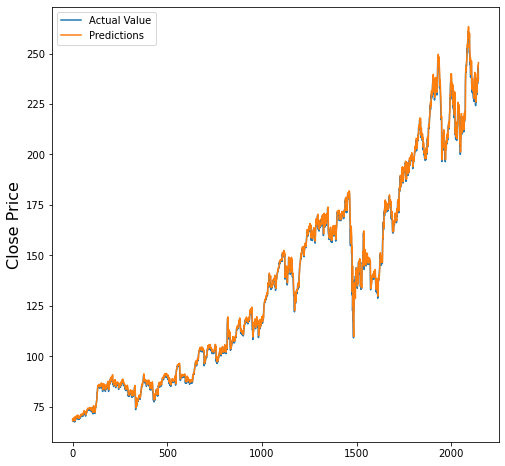

In [83]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [84]:
# 2. ANN

In [85]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [86]:
# Model Training

model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
215/215 [==============================] - 1s 2ms/step - loss: 425.7910 - val_loss: 593.0148
Epoch 2/100
215/215 [==============================] - 0s 1ms/step - loss: 26.6017 - val_loss: 19.2547
Epoch 3/100
215/215 [==============================] - 0s 1ms/step - loss: 6.5140 - val_loss: 5.5240
Epoch 4/100
215/215 [==============================] - 0s 1ms/step - loss: 2.0634 - val_loss: 2.8539
Epoch 5/100
215/215 [==============================] - 0s 1ms/step - loss: 1.2311 - val_loss: 2.6648
Epoch 6/100
215/215 [==============================] - 0s 1ms/step - loss: 1.1526 - val_loss: 2.4432
Epoch 7/100
215/215 [==============================] - 0s 1ms/step - loss: 1.1347 - val_loss: 2.4377
Epoch 8/100
215/215 [==============================] - 0s 1ms/step - loss: 1.1343 - val_loss: 2.4478
Epoch 9/100
215/215 [==============================] - 0s 1ms/step - loss: 1.1212 - val_loss: 2.3980
Epoch 10/100
215/215 [==============================] - 0s 2ms/step - loss: 1.1156 - 

In [87]:
#Prediction
y_pred_2 = model_2.predict(X_test)

68/68 [==============================] - 0s 768us/step


In [88]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9952956477180984


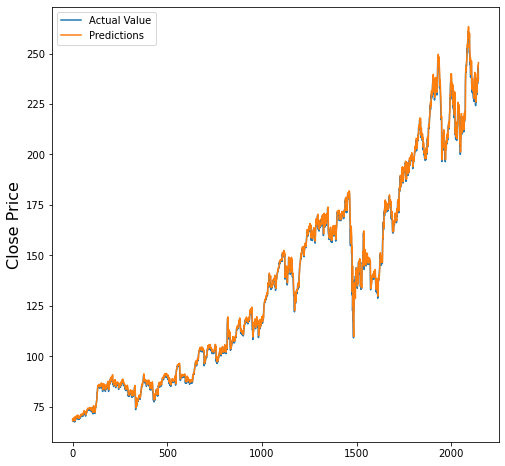

In [89]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [90]:
# 3. CNN

In [91]:
# Model Training

model_3 = regressor(inp_dim=30)
model_3.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
215/215 [==============================] - 1s 2ms/step - loss: 340.5488 - val_loss: 38.9108
Epoch 2/100
215/215 [==============================] - 0s 1ms/step - loss: 13.7601 - val_loss: 7.1286
Epoch 3/100
215/215 [==============================] - 0s 1ms/step - loss: 2.2718 - val_loss: 2.6807
Epoch 4/100
215/215 [==============================] - 0s 1ms/step - loss: 1.1995 - val_loss: 2.6145
Epoch 5/100
215/215 [==============================] - 0s 2ms/step - loss: 1.1544 - val_loss: 2.4385
Epoch 6/100
215/215 [==============================] - 0s 2ms/step - loss: 1.1418 - val_loss: 2.3986
Epoch 7/100
215/215 [==============================] - 0s 2ms/step - loss: 1.1362 - val_loss: 2.3874
Epoch 8/100
215/215 [==============================] - 0s 2ms/step - loss: 1.1127 - val_loss: 2.3498
Epoch 9/100
215/215 [==============================] - 0s 2ms/step - loss: 1.1011 - val_loss: 2.3930
Epoch 10/100
215/215 [==============================] - 0s 2ms/step - loss: 1.0981 - va

In [92]:
# Prediction
y_pred_3=model_3.predict(X_test_)


68/68 [==============================] - 0s 1ms/step


In [99]:
pred_df =pd.DataFrame({'Actual':y_test,'Predicted':y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,68.546007,66.870232
1,68.247499,67.332428
2,68.177263,67.624771
3,68.466989,67.845840
4,67.755838,68.099152


In [94]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions:{0}".format(r2_score(y_test,y_pred_3)))
Acc.append(r2_score(y_test,y_pred_3))

Accuracy score of the predictions:0.996138951805221


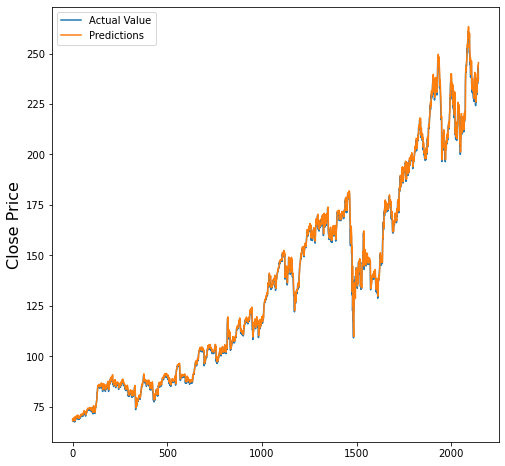

In [95]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [96]:
#Comparision of Accuracies of different models

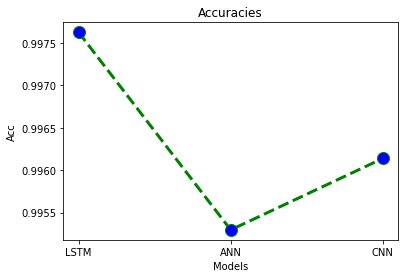

In [97]:
plt.plot(range(3),Acc,color='green',linestyle='dashed',linewidth =3,
         marker='o',markerfacecolor='blue',markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3),['LSTM', 'ANN', 'CNN'])
plt.show()